## Druhy chyb
* Fyzikální aproximace - Newton/OTR...
* Chyba vstupních parametrů - poč. podm., fyzikální konstanty...
* Chyba metody - v důsledku diskretizace. Tím se budeme hlavně zabývat
* Zaokrouhlovací chyba - v důsledku konečné přesnosti počítače

# Numerické derivování

Je základem numerických metod ve fyzice (ODR, PDR...)

Jak vyhodnocováním $f(x)$ v různých bodech zjistit $f'(x)$? Vyjdeme z definice
$$
f'(x) = \lim_{h\to 0}\frac{f(x+h)-f(x)}{h}
$$

Diskretizace, otázka přesnosti (chyba metody a zaokrouhlovací chyba), dopředné diference, centrální diference

Asymptotické chování chyby a její eliminace - Richardsonova extrapolace



In [1]:
%matplotlib inline
%config InlineBackend.close_figures=False
import pylab as P
import numpy as N

In [2]:
# definujeme funkci pro výpočet dopředných diferencí:
def diff_FD(f, x, dx): return (f(x+dx) - f(x))/dx

In [3]:
# asymptotická chyba dopředných diferencí určená Taylorovým rozvojem:
def diff_FD_err(f, d2f, d3f, x, dx): return 0.5*d2f(x)*dx

In [4]:
# použijeme sin(x) pro testování
def f(x): return N.sin(x)
def dfdx(x): return N.cos(x)
def dfdx2(x): return -N.sin(x)
def dfdx3(x): return -N.cos(x)

In [5]:
# vypočteme derivaci pro x0=1.0 pro následující hodnoty dx
x0 = 1.0
dx = N.logspace(-17, 1, 500)

In [6]:
def format_plot(show=True):
    from matplotlib.ticker import LogLocator
    P.gca().xaxis.set_major_locator(LogLocator(base=100., numticks=20))
    if show:
        P.show()

## Chyba dopředných diferencí

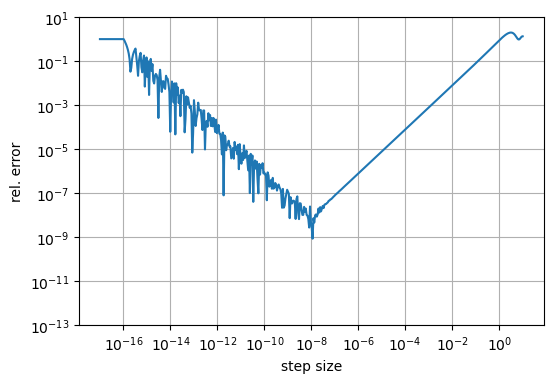

In [7]:
P.figure(figsize=(6,4))

rel_err = N.abs((diff_FD(f, x0, dx) - dfdx(x0))/dfdx(x0))
P.loglog(dx, rel_err)
    
# nastavení vykreslování
%config InlineBackend.close_figures=False
P.ylim([1e-13, 1e1])
format_plot(False)
P.xlabel("step size")
P.ylabel("rel. error")
P.grid(which="both")



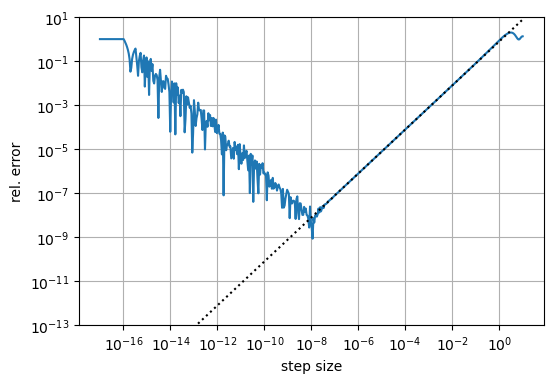

In [8]:
# porovnáme s asymptotickou hodnotou chyby
err = N.abs(diff_FD_err(f, dfdx2, dfdx3, x0, dx)/dfdx(x0))
P.loglog(dx, err,":k")

format_plot()

In [9]:
import sys
print(sys.float_info)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


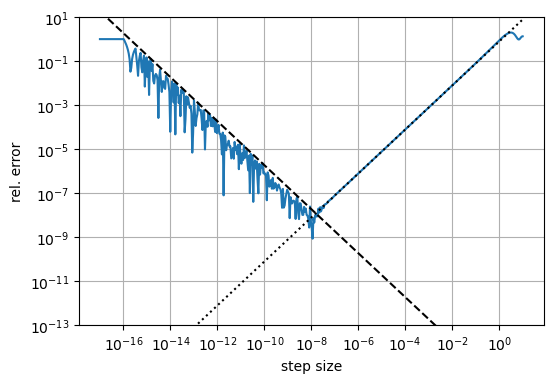

In [10]:
P.loglog(dx, f(x0)*sys.float_info.epsilon/dx,"--k")

format_plot()

In [11]:
# definujeme funkce pro výpočet centrovaných diferencí:
def diff_CD(f, x, dx): return (f(x+dx) - f(x-dx))/(2*dx)

# ...a asymptotické chování chyby centrovaných diferencí:
def diff_CD_err(f, d2f, d3f, x, dx): return 1/6.*d3f(x)*dx**2

## Chyba centrálních diferencí

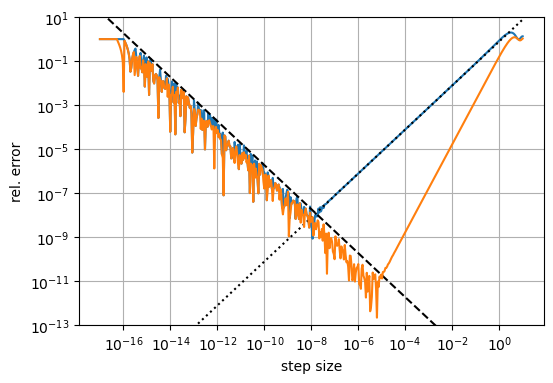

In [12]:
rel_err = N.abs((diff_CD(f, x0, dx) - dfdx(x0))/dfdx(x0))
P.loglog(dx, rel_err)

format_plot()

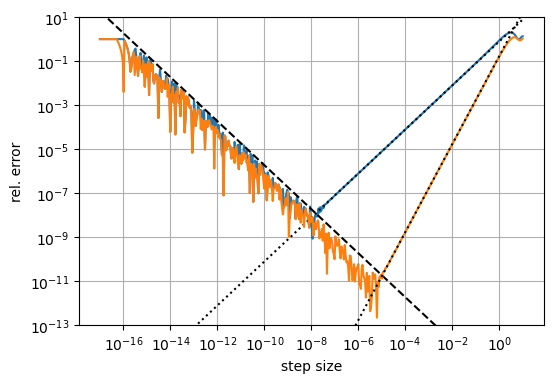

In [13]:
# porovnáme s asymptotickou hodnotou chyby
err = N.abs(diff_CD_err(f, dfdx2, dfdx3, x0, dx)/dfdx(x0))
P.loglog(dx, err,":k")

format_plot()

## Richardsonova extrapolace

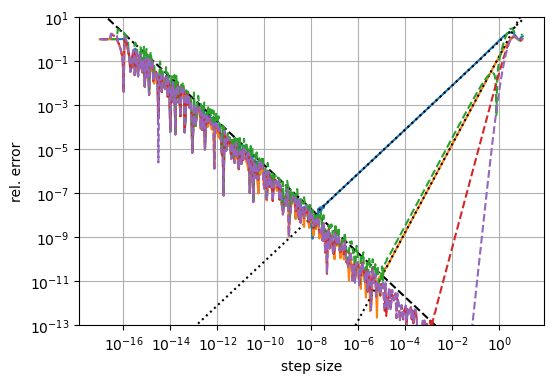

In [14]:
# zkusme aplikovat Richardsonovu extrapolaci na obě metody, a poté zkusme odečíst
# první čtyři členy asymptotického chybového rozvoje
def richardson(f, x0, dx, p):
    if len(p) > 1:
        return (2**p[0]*richardson(f, x0, dx, p[1:]) -\
                richardson(f, x0, 2*dx, p[1:]))/(2**p[0]-1)
    return (2**p[0]*operator(f, x0, dx) - operator(f, x0, 2*dx))/(2**p[0]-1)

for operator, p1 in [(diff_FD, [1]), (diff_CD, [2]), (diff_CD, [2, 4, 6, 8])]:
    rel_err = N.abs((richardson(f, x0, dx, p1) - dfdx(x0))/dfdx(x0))
    P.loglog(dx, rel_err,"--")
    
format_plot()

Vskutku můžeme snadno získat metodu 10. řádu přesnosti, i když možná nebude nejefektivnější.

### Poznámka

při odvozování nám může pomoct počítač, konkrétně knihovna sympy

www.sympy.org

In [15]:
from sympy import *
x, y, z, t = symbols('x y z t')
f = symbols('f', cls=Function)
h, u = symbols("h u")

Rozvoj funkce do Taylorovy řady:

In [16]:
f(x).series(x, 0)

f(0) + x*Subs(Derivative(f(xi), xi), xi, 0) + x**2*Subs(Derivative(f(xi), (xi, 2)), xi, 0)/2 + x**3*Subs(Derivative(f(xi), (xi, 3)), xi, 0)/6 + x**4*Subs(Derivative(f(xi), (xi, 4)), xi, 0)/24 + x**5*Subs(Derivative(f(xi), (xi, 5)), xi, 0)/120 + O(x**6)

Aproximace derivace metodou dopředných diferencí

In [17]:
f(t).series(t, x)

f(x) + (t - x)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x) + (t - x)**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x)/2 + (t - x)**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, x)/6 + (t - x)**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, x)/24 + (t - x)**5*Subs(Derivative(f(_xi_1), (_xi_1, 5)), _xi_1, x)/120 + O((t - x)**6, (t, x))

In [18]:
(f(t).series(t, x).subs(t, x+h) - f(x))/h

(h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x) + h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x)/2 + h**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, x)/6 + h**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, x)/24 + h**5*Subs(Derivative(f(_xi_1), (_xi_1, 5)), _xi_1, x)/120 + O(h**6))/h

In [19]:
_.expand()

Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x) + h*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x)/2 + h**2*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, x)/6 + h**3*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, x)/24 + h**4*Subs(Derivative(f(_xi_1), (_xi_1, 5)), _xi_1, x)/120 + O(h**5)

a metodou centrovaných diferencí

In [20]:
((f(t).series(t, x).subs(t, x+h) - f(t).series(t, x).subs(t, x-h))/(2*h)).expand()

Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x) + h**2*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, x)/6 + h**4*Subs(Derivative(f(_xi_1), (_xi_1, 5)), _xi_1, x)/120 + O(h**5)

### Chyba lichoběžníkového pravidla
Obdobně lze sympy použít pro rozbor chyb integrace. Vypočteme aproximaci integrálu lichoběžníkovým pravidlem. Rozvoj provádíme ze středu intervalu.

In [21]:
series = f(t).series(t, y, 8)
Ihat = h/2*(series.subs(t, y+h/2) + series.subs(t, y-h/2))
Ihat.expand()

h*f(y) + h**3*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, y)/8 + h**5*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, y)/384 + h**7*Subs(Derivative(f(_xi_1), (_xi_1, 6)), _xi_1, y)/46080 + O(h**9)

Dále analyticky vypočteme integrál rozvoje

In [22]:
I = integrate(series.subs(t, y+u), (u, -h/2, +h/2))
I

h*f(y) + h**3*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, y)/24 + h**5*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, y)/1920 + h**7*Subs(Derivative(f(_xi_1), (_xi_1, 6)), _xi_1, y)/322560 + O(h**9)

a obě hodnoty porovnáme

In [23]:
(Ihat - I).expand()

h**3*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, y)/12 + h**5*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, y)/480 + h**7*Subs(Derivative(f(_xi_1), (_xi_1, 6)), _xi_1, y)/53760 + O(h**9)

### Numerické integrování
Poznámka k numerickému sčítání řad

In [24]:
import numpy as np

In [25]:
# naivni sumace
def simplesum(input):
    summ  = 0
    for num in input:
        summ += num
    return summ

In [26]:
# kahanova sumace
def kahansum(input):
    summ = c = 0
    for num in input:
        y = num - c
        t = summ + y
        c = (t - summ) - y
        summ = t
    return summ

In [27]:
data = np.ones(10**7)*1e-7
data

array([1.e-07, 1.e-07, 1.e-07, ..., 1.e-07, 1.e-07, 1.e-07])

In [28]:
simplesum(data)-1

-2.4983004554002264e-10

In [29]:
kahansum(data)-1

0.0

In [30]:
data.sum()-1

1.7319479184152442e-14

In [31]:
data = np.array([1e15, np.pi, -1e15, -np.pi])

In [32]:
simplesum(data)

-0.016592653589793116

In [33]:
kahansum(data)

-0.016592653589793116

In [34]:
data.sum()

-0.016592653589793116

In [35]:
# Neumaierova sumace https://en.wikipedia.org/wiki/Kahan_summation_algorithm#Further_enhancements
def nmsum(input):
    summ = 0.0
    c = 0.0                 # A running compensation for lost low-order bits.
    for num in input:
        t = summ + num
        if abs(summ) >= abs(num):
            c += (summ - t) + num # If sum is bigger, low-order digits of input[i] are lost.
        else:
            c += (num - t) + summ # Else low-order digits of sum are lost
        summ = t
    return summ + c               # Correction only applied once in the very end

In [36]:
nmsum(data)

0.0

In [37]:
import math
math.fsum(data)

0.0

In [38]:
import sys
sys.float_info.epsilon

2.220446049250313e-16